In [56]:
import pandas as pd
imdb_titles_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_runtime = imdb_titles_basics.copy(deep='True')
imdb_runtime.drop(['original_title'], axis=1, inplace=True)

In [57]:
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [58]:
imdb_time_rating = pd.merge(imdb_runtime, imdb_ratings, on='tconst')
imdb_time_rating.drop(['tconst'], axis=1, inplace=True)
imdb_time_rating

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73851,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,Albatross,2017,NaN,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [59]:
imdb_time_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   start_year       73856 non-null  int64  
 2   runtime_minutes  66236 non-null  float64
 3   genres           73052 non-null  object 
 4   averagerating    73856 non-null  float64
 5   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.9+ MB


In [60]:
imdb_time_rating.duplicated().sum()

0

In [61]:
imdb_time_rating.isna().sum()

primary_title         0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [62]:
imdb_time_rating.dropna(subset=['runtime_minutes', 'genres'], inplace=True)

In [63]:
imdb_time_rating.to_csv('data/time_rating.csv', index=False)

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline

In [66]:
imdb_time_rating

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...
73849,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,Swarm Season,2019,86.0,Documentary,6.2,5
73851,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [67]:
imdb_time_rating['averagerating']

0        7.0
1        7.2
2        6.9
4        6.5
6        8.1
        ... 
73849    8.4
73850    6.2
73851    6.2
73852    8.7
73855    6.5
Name: averagerating, Length: 65720, dtype: float64

In [72]:
imdb_time_rating['averagerating'].astype('int64')

0        7
1        7
2        6
4        6
6        8
        ..
73849    8
73850    6
73851    6
73852    8
73855    6
Name: averagerating, Length: 65720, dtype: int64

In [74]:
imdb_time_rating['runtime_minutes'].astype('int64')

0        175
1        114
2        122
4         80
6         83
        ... 
73849    130
73850     86
73851     75
73852     98
73855     72
Name: runtime_minutes, Length: 65720, dtype: int64

In [112]:
imdb_time_rating.bar(x='averagerating', y='runtime_minutes', title='Runtime versus Average Rating')

AttributeError: 'DataFrame' object has no attribute 'bar'

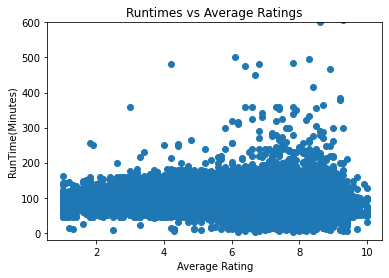

In [111]:
fig, ax = plt.subplots()
ax.scatter(imdb_time_rating['averagerating'], imdb_time_rating['runtime_minutes'])
ax.set_title('Runtimes vs Average Ratings')
ax.set_xlabel('Average Rating')
ax.set_ylabel('RunTime(Minutes)')
ax.set_ylim(-20,600);